# Practica 2: Predicción de Series Temporales

# Autores: 

- Alejandro López Cuéllar
- Miguel Ángel Vera Frutos
- Alejandro Belda Fernández


# Importación de librerías

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import os
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import KNNImputer
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LinearRegression
import skforecast
import random
from skforecast import ForecasterAutoregDirect
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries
from skforecast.utils import save_forecaster, load_forecaster
from lightgbm import LGBMRegressor
from skforecast.metrics import root_mean_squared_scaled_error
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_squared_error
from skforecast.model_selection import grid_search_forecaster
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate

c:\Users\migue\anaconda3\envs\ML_palma\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#  Establecer la configuración regional

Para Linux y MacOS:

In [2]:
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")

'es_ES.UTF-8'

Para Windows

In [3]:

locale.setlocale(locale.LC_TIME, "Spanish_Spain.1252")

'Spanish_Spain.1252'

# Definir semilla

In [4]:
SEED = 123
np.random.seed(SEED)
random.seed(SEED)

# Definición rutas ficheros

In [5]:
ruta = "dataset/Aljorrahorarias2017.xls"
ruta2 = "dataset/Aljorrahorarias2018.xls"
ruta3 = "dataset/Aljorrahorarias2019.xls"
ruta4 = "dataset/Aljorrahorarias2020.xls"
ruta5 = "dataset/Aljorrahorarias2021.xls"
ruta6 = "dataset/Aljorrahorarias2022.xls"


# Lectura de datos

In [6]:
# Leer el archivo completo
df = pd.read_excel(ruta, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df["Fecha"] = df["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df.set_index("Fecha", inplace=True)


# Leer el archivo completo
df2 =  pd.read_excel(ruta2, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df2["Fecha"] = df2["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df2.set_index("Fecha", inplace=True)

# Leer el archivo completo
df3 =  pd.read_excel(ruta3, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df3["Fecha"] = df3["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df3.set_index("Fecha", inplace=True)

# Leer el archivo completo
df4 =  pd.read_excel(ruta4, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df4["Fecha"] = df4["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df4.set_index("Fecha", inplace=True)

# Leer el archivo completo
df5 =  pd.read_excel(ruta5, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df5["Fecha"] = df5["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df5.set_index("Fecha", inplace=True)

# Leer el archivo completo
df6 =  pd.read_excel(ruta6, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df6["Fecha"] = df6["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df6.set_index("Fecha", inplace=True)




*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_23276\1045028487.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Fecha"] = df["Fecha"].dt.floor('H')
C:\Users\migue\AppData\Local\Temp\ipykernel_23276\1045028487.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2["Fecha"] = df2["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_23276\1045028487.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df3["Fecha"] = df3["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_23276\1045028487.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df4["Fecha"] = df4["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_23276\1045028487.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df5["Fecha"] = df5["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_23276\1045028487.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df6["Fecha"] = df6["Fecha"].dt.floor('H')


# Unir dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7129 non-null   float64
 1   NO2 (µg/m³N)   7129 non-null   float64
 2   SO2 (µg/m³N)   7580 non-null   float64
 3   O3 (µg/m³N)    8715 non-null   float64
 4   TMP (ºC)       8748 non-null   float64
 5   HR (% H.R.)    8748 non-null   float64
 6   NOX (µg/m³N)   7129 non-null   float64
 7   DD (grados)    8748 non-null   float64
 8   PRB (mb)       8748 non-null   float64
 9   RS (W/m³)      8748 non-null   float64
 10  VV (m/s)       8748 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8747 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Como podemos ver tiene una gran cantidad de variables nulas

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7583 non-null   float64
 1   NO2 (µg/m³N)   7583 non-null   float64
 2   SO2 (µg/m³N)   8551 non-null   float64
 3   O3 (µg/m³N)    8593 non-null   float64
 4   TMP (ºC)       8657 non-null   float64
 5   HR (% H.R.)    8657 non-null   float64
 6   NOX (µg/m³N)   7583 non-null   float64
 7   DD (grados)    8657 non-null   float64
 8   PRB (mb)       8657 non-null   float64
 9   RS (W/m³)      8657 non-null   float64
 10  VV (m/s)       8657 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8178 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Tambien tiene muchas columnas nulas

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7932 non-null   float64
 1   NO2 (µg/m³N)   7932 non-null   float64
 2   SO2 (µg/m³N)   7635 non-null   float64
 3   O3 (µg/m³N)    8125 non-null   float64
 4   TMP (ºC)       8223 non-null   float64
 5   HR (% H.R.)    8223 non-null   float64
 6   NOX (µg/m³N)   7932 non-null   float64
 7   DD (grados)    8223 non-null   float64
 8   PRB (mb)       8223 non-null   float64
 9   RS (W/m³)      8223 non-null   float64
 10  VV (m/s)       8224 non-null   float64
 11  C6H6 (µg/m³N)  3156 non-null   float64
 12  C7H8 (µg/m³N)  3156 non-null   float64
 13  XIL (µg/m³N)   3156 non-null   float64
 14  PM10 (µg/m³N)  8220 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8464 non-null   float64
 1   NO2 (µg/m³N)   8464 non-null   float64
 2   SO2 (µg/m³N)   7944 non-null   float64
 3   O3 (µg/m³N)    8693 non-null   float64
 4   TMP (ºC)       8682 non-null   float64
 5   HR (% H.R.)    8682 non-null   float64
 6   NOX (µg/m³N)   8464 non-null   float64
 7   DD (grados)    8682 non-null   float64
 8   PRB (mb)       8682 non-null   float64
 9   RS (W/m³)      8682 non-null   float64
 10  VV (m/s)       8682 non-null   float64
 11  C6H6 (µg/m³N)  6988 non-null   float64
 12  C7H8 (µg/m³N)  6988 non-null   float64
 13  XIL (µg/m³N)   6988 non-null   float64
 14  PM10 (µg/m³N)  8498 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [11]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8245 non-null   float64
 1   NO2 (µg/m³N)   8245 non-null   float64
 2   SO2 (µg/m³N)   7812 non-null   float64
 3   O3 (µg/m³N)    8214 non-null   float64
 4   TMP (ºC)       8248 non-null   float64
 5   HR (% H.R.)    8248 non-null   float64
 6   NOX (µg/m³N)   8245 non-null   float64
 7   DD (grados)    8248 non-null   float64
 8   PRB (mb)       8248 non-null   float64
 9   RS (W/m³)      8248 non-null   float64
 10  VV (m/s)       8248 non-null   float64
 11  C6H6 (µg/m³N)  3925 non-null   float64
 12  C7H8 (µg/m³N)  3925 non-null   float64
 13  XIL (µg/m³N)   3925 non-null   float64
 14  PM10 (µg/m³N)  8004 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [12]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8639 non-null   float64
 1   NO2 (µg/m³N)   8639 non-null   float64
 2   SO2 (µg/m³N)   6868 non-null   float64
 3   O3 (µg/m³N)    4286 non-null   float64
 4   TMP (ºC)       8693 non-null   float64
 5   HR (% H.R.)    8693 non-null   float64
 6   NOX (µg/m³N)   8639 non-null   float64
 7   DD (grados)    8693 non-null   float64
 8   PRB (mb)       8693 non-null   float64
 9   RS (W/m³)      8693 non-null   float64
 10  VV (m/s)       8693 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8097 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Tiene una gran cantidad de columnas nulas tambien

In [13]:
data= pd.concat([df3,df4,df5,df6])

# Guardar en un archivo CSV
df.to_csv('dataset.csv', index=False)

# Analisis y preprocesamiento

## Información del dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    33280 non-null  float64
 1   NO2 (µg/m³N)   33280 non-null  float64
 2   SO2 (µg/m³N)   30259 non-null  float64
 3   O3 (µg/m³N)    29318 non-null  float64
 4   TMP (ºC)       33846 non-null  float64
 5   HR (% H.R.)    33846 non-null  float64
 6   NOX (µg/m³N)   33280 non-null  float64
 7   DD (grados)    33846 non-null  float64
 8   PRB (mb)       33846 non-null  float64
 9   RS (W/m³)      33846 non-null  float64
 10  VV (m/s)       33847 non-null  float64
 11  C6H6 (µg/m³N)  14069 non-null  float64
 12  C7H8 (µg/m³N)  14069 non-null  float64
 13  XIL (µg/m³N)   14069 non-null  float64
 14  PM10 (µg/m³N)  32819 non-null  float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 4.5 MB


## Visualización y tratamiento de valores faltantes

In [15]:
data.isna().sum()

NO (µg/m³N)       1784
NO2 (µg/m³N)      1784
SO2 (µg/m³N)      4805
O3 (µg/m³N)       5746
TMP (ºC)          1218
HR (% H.R.)       1218
NOX (µg/m³N)      1784
DD (grados)       1218
PRB (mb)          1218
RS (W/m³)         1218
VV (m/s)          1217
C6H6 (µg/m³N)    20995
C7H8 (µg/m³N)    20995
XIL (µg/m³N)     20995
PM10 (µg/m³N)     2245
Ruido (dBA)      35064
dtype: int64

In [16]:
data = data.drop(columns=['Ruido (dBA)'])

In [17]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,NaN,NaN,NaN,10.0
2019-01-01 01:00:00,4.0,19.0,14.0,57.0,11.0,61.0,24.0,292.0,1029.0,2.0,1.0,NaN,NaN,NaN,8.0
2019-01-01 02:00:00,4.0,20.0,16.0,48.0,10.0,65.0,26.0,299.0,1029.0,2.0,1.0,NaN,NaN,NaN,12.0
2019-01-01 03:00:00,4.0,18.0,14.0,47.0,9.0,68.0,23.0,302.0,1028.0,3.0,1.0,NaN,NaN,NaN,8.0
2019-01-01 04:00:00,4.0,12.0,16.0,55.0,10.0,64.0,18.0,298.0,1029.0,3.0,1.0,NaN,NaN,NaN,5.0


In [18]:
duplicates = data.index.duplicated()
print(data.index[duplicates])
print(data.index.is_unique)

DatetimeIndex([], dtype='datetime64[ns]', name='Fecha', freq=None)
True


In [19]:
data_lineal = data.interpolate(method='linear', limit_direction='both')


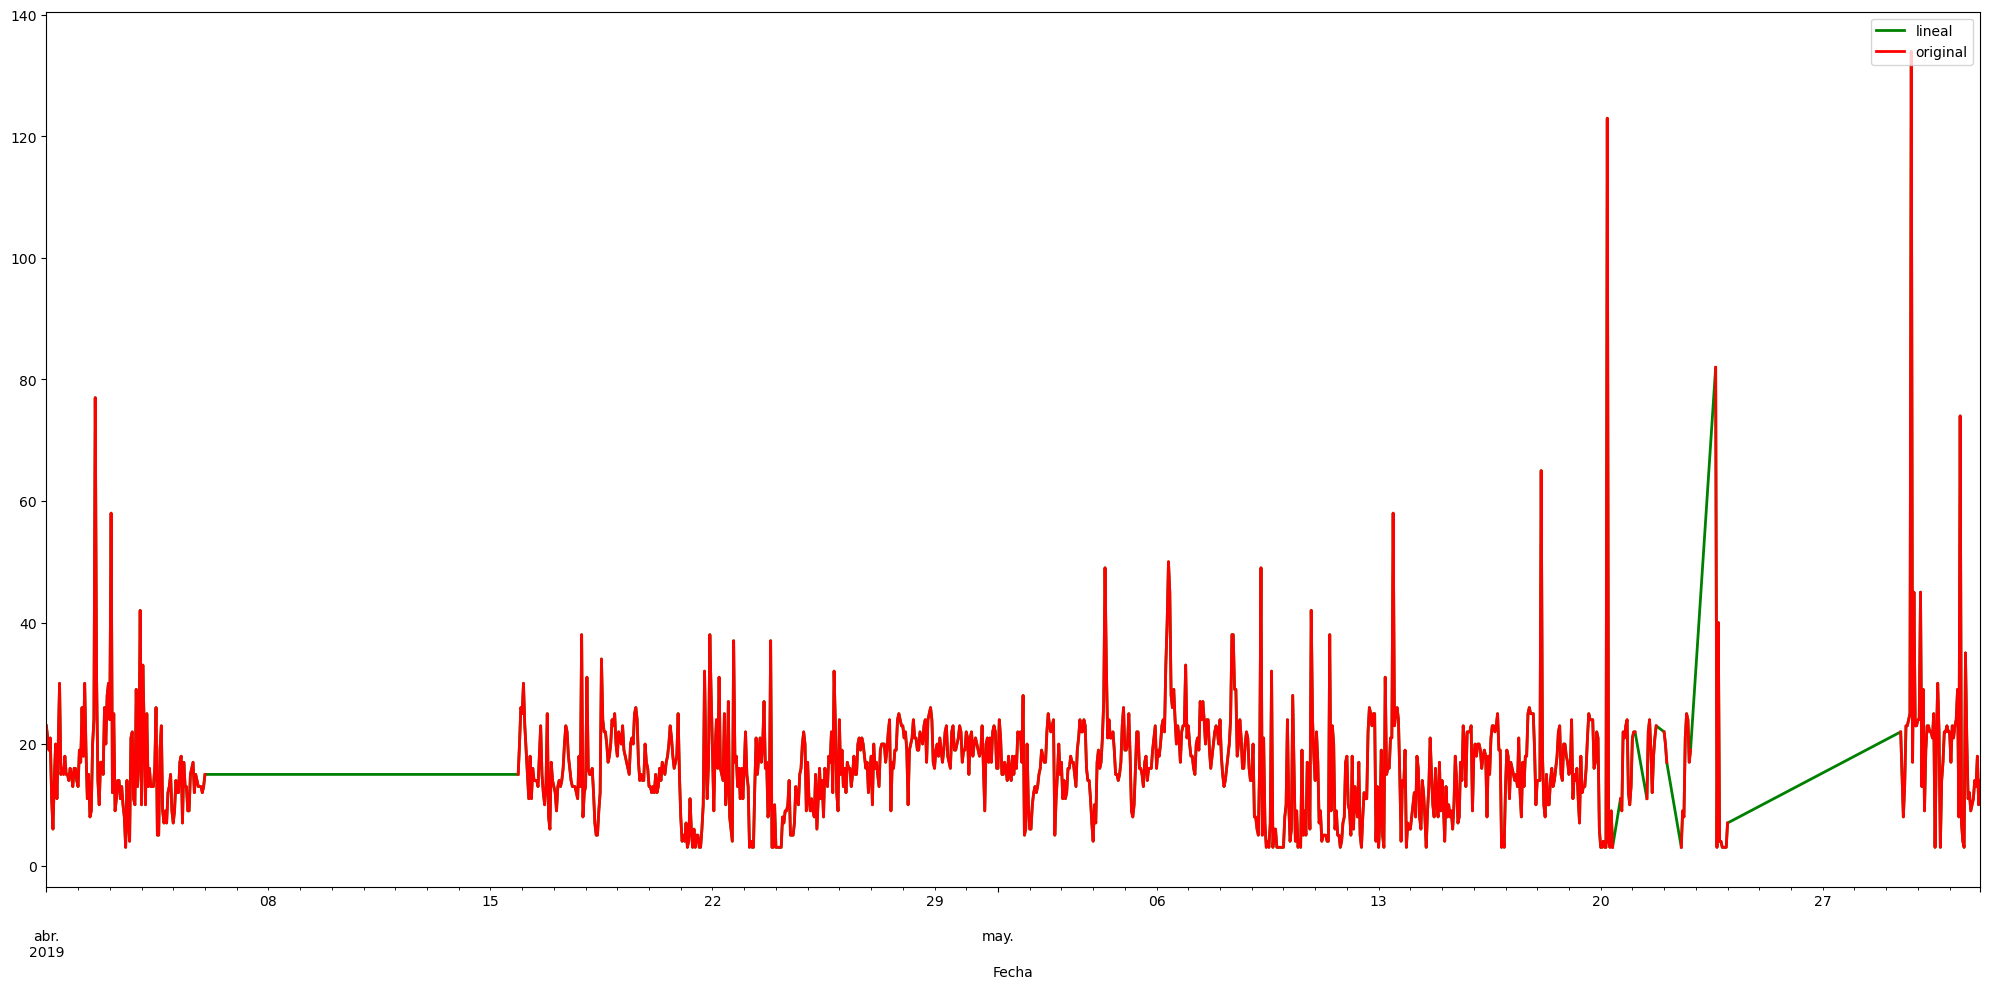

In [20]:
ax = data_lineal['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
data['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

In [21]:
# Diccionario para almacenar los resultados de imputación
imputed_datasets = {}

# Probar diferentes números de vecinos
for n in [2, 5, 7, 10]:
    imputer = KNNImputer(n_neighbors=n)
    imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    imputed_data.index = data.index
    imputed_datasets[n] = imputed_data  # Almacenar el resultado en el diccionario
    
    print(f"\nImputación con {n} vecinos:")
    print(imputed_data.head())

data_imputed = imputed_datasets[10]


Imputación con 2 vecinos:
                     NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  \
Fecha                                                                       
2019-01-01 00:00:00          3.0          18.0          14.0         55.0   
2019-01-01 01:00:00          4.0          19.0          14.0         57.0   
2019-01-01 02:00:00          4.0          20.0          16.0         48.0   
2019-01-01 03:00:00          4.0          18.0          14.0         47.0   
2019-01-01 04:00:00          4.0          12.0          16.0         55.0   

                     TMP (ºC)  HR (% H.R.)  NOX (µg/m³N)  DD (grados)  \
Fecha                                                                   
2019-01-01 00:00:00      11.0         72.0          23.0        295.0   
2019-01-01 01:00:00      11.0         61.0          24.0        292.0   
2019-01-01 02:00:00      10.0         65.0          26.0        299.0   
2019-01-01 03:00:00       9.0         68.0          23.0        302.

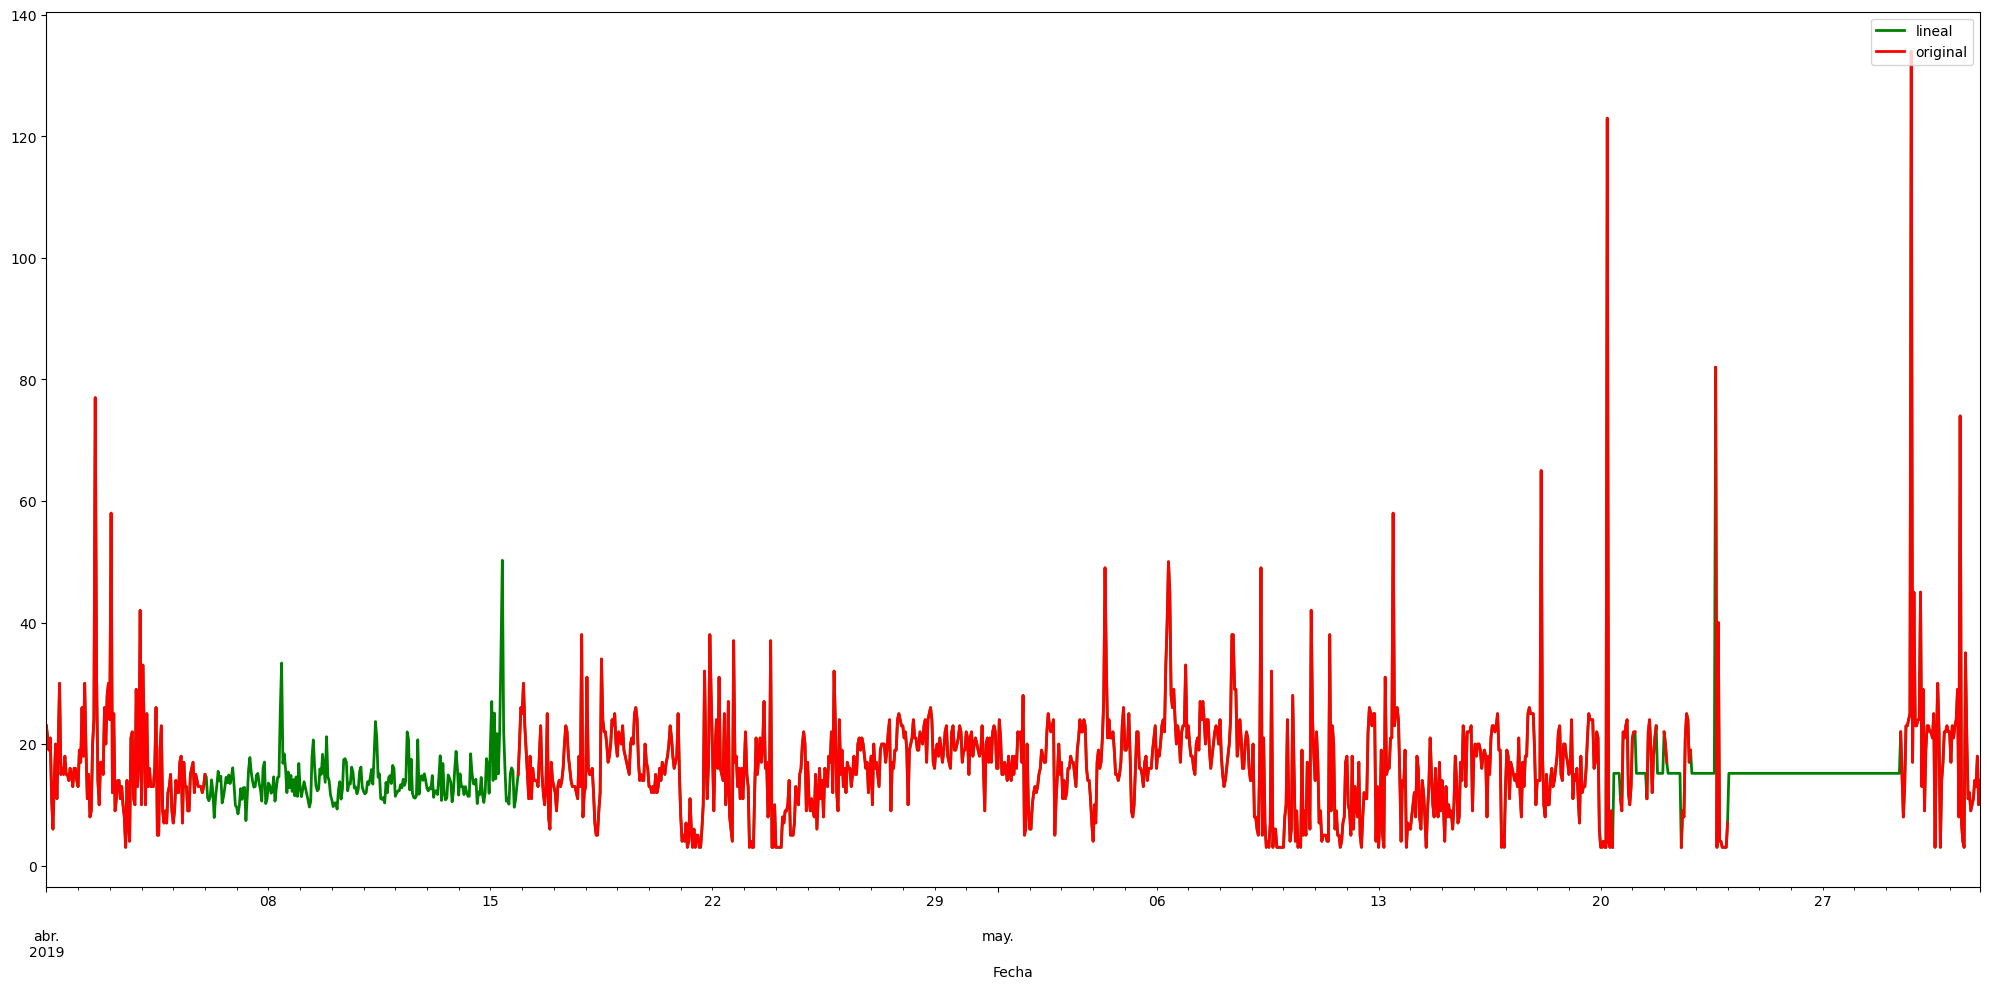

In [22]:
ax = data_imputed['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
data['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

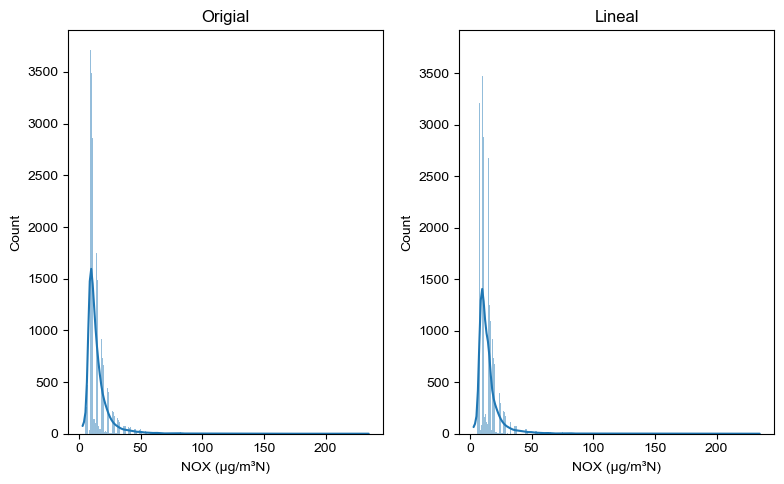

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
series = [data["NOX (µg/m³N)"],data_imputed["NOX (µg/m³N)"]]
titulos = ['Origial','Lineal']
axs = axs.flatten()
sns.set(font_scale = 1)
for df, ax, titulo in  zip(series,axs,titulos):
    sns.histplot(df,kde=True,stat='count', ax=ax)
    ax.set_title(titulo)
fig.tight_layout()
plt.show()

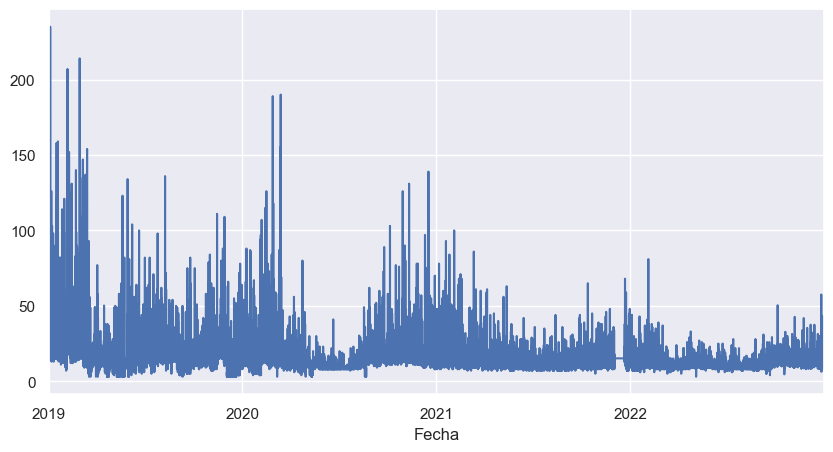

In [24]:
ax = data_imputed["NOX (µg/m³N)"].plot(figsize=(10, 5))


In [25]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    35064 non-null  float64
 1   NO2 (µg/m³N)   35064 non-null  float64
 2   SO2 (µg/m³N)   35064 non-null  float64
 3   O3 (µg/m³N)    35064 non-null  float64
 4   TMP (ºC)       35064 non-null  float64
 5   HR (% H.R.)    35064 non-null  float64
 6   NOX (µg/m³N)   35064 non-null  float64
 7   DD (grados)    35064 non-null  float64
 8   PRB (mb)       35064 non-null  float64
 9   RS (W/m³)      35064 non-null  float64
 10  VV (m/s)       35064 non-null  float64
 11  C6H6 (µg/m³N)  35064 non-null  float64
 12  C7H8 (µg/m³N)  35064 non-null  float64
 13  XIL (µg/m³N)   35064 non-null  float64
 14  PM10 (µg/m³N)  35064 non-null  float64
dtypes: float64(15)
memory usage: 5.3 MB


In [26]:
data_imputed.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.0
2019-01-01 01:00:00,4.0,19.0,14.0,57.0,11.0,61.0,24.0,292.0,1029.0,2.0,1.0,0.84,0.76,1.85,8.0
2019-01-01 02:00:00,4.0,20.0,16.0,48.0,10.0,65.0,26.0,299.0,1029.0,2.0,1.0,0.22,0.57,1.09,12.0
2019-01-01 03:00:00,4.0,18.0,14.0,47.0,9.0,68.0,23.0,302.0,1028.0,3.0,1.0,0.24,0.44,1.11,8.0
2019-01-01 04:00:00,4.0,12.0,16.0,55.0,10.0,64.0,18.0,298.0,1029.0,3.0,1.0,0.73,0.78,1.61,5.0


## Establecer Frecuencia del Dataset

In [27]:
data_imputed.asfreq('D')

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.00
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.53,0.78,1.08,16.00
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.61,0.78,1.31,9.00
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.50,0.99,0.84,22.00
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.41,0.73,0.47,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53


In [28]:
fechas_esperadas =  pd.date_range(start=data_imputed.index.min(), end=data_imputed.index.max(), freq='D')
fechas_perdidas = fechas_esperadas.difference(data_imputed.index)
fechas_perdidas

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [29]:
print(f'Tenemos un tota de {len(fechas_perdidas)} fechas perdidas')

Tenemos un tota de 0 fechas perdidas


In [30]:
data_imputed = data_imputed.reindex(fechas_esperadas)
data_imputed

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.00
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.53,0.78,1.08,16.00
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.61,0.78,1.31,9.00
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.50,0.99,0.84,22.00
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.41,0.73,0.47,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.25,1.22,1.16,27.52


In [31]:
data_anual = pd.DataFrame(data_imputed)
data_anual['Año'] = data_anual.index.year
data_anual

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Año
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.54,0.58,1.56,10.00,2019
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.53,0.78,1.08,16.00,2019
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.61,0.78,1.31,9.00,2019
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.50,0.99,0.84,22.00,2019
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.41,0.73,0.47,19.00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70,2022
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44,2022
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53,2022
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.25,1.22,1.16,27.52,2022


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


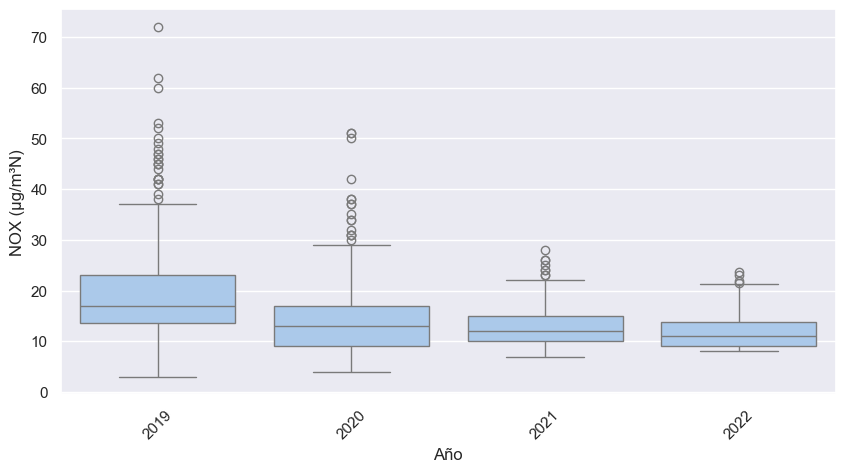

In [32]:
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')

# Gráfico de cajas
sns.boxplot(x='Año', y='NOX (µg/m³N)', data=data_anual)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

## Estacionalidad de la serie

Si todos los atributos obtienen un p-value menor que 0.05 podremos saber que la serie es estacionaria

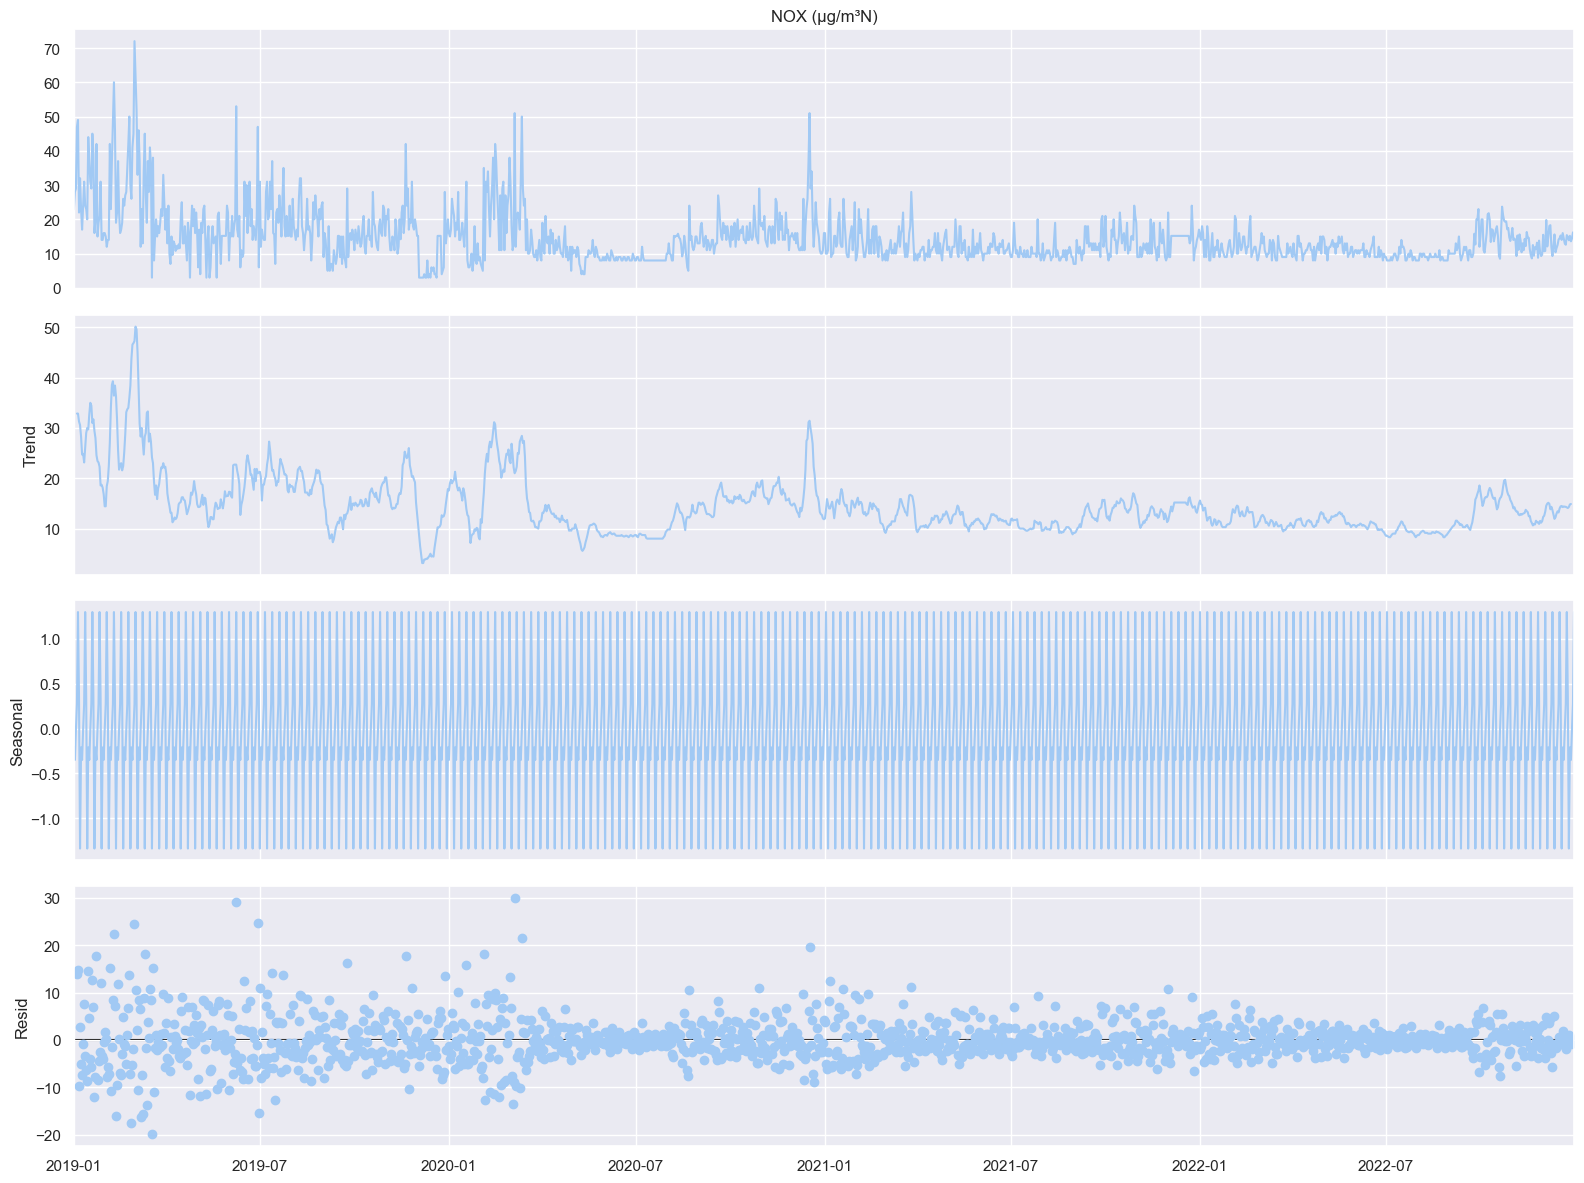

In [33]:
nox_dec = sm.tsa.seasonal_decompose(data_imputed["NOX (µg/m³N)"], model="aditive")
fig = nox_dec.plot()
fig.set_size_inches((16, 12))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [34]:
result = adfuller(data_imputed['NOX (µg/m³N)'])
print("---- NOX ----")
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

---- NOX ----
Estadístico ADF : -4.296671
p-value: 0.000450
Valores críticos:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## Transformaciones 

# Entrenamiento y Validación

### Division Train y Test

In [35]:

test_steps = 7
train = data_imputed[:-test_steps]  # Todo menos las últimas 7 fechas
test = data_imputed[-test_steps:]  # Últimas 7 fechas
print(f'Tamaño del conjunto de training es %i' %len(train))
print(f'Tamaño del conjunto de test es %i' %len(test))
print(f'El conjunto de training va de {min(train.index)} y {max(train.index)}')
print(f'El conjunto de test va de {min(test.index)} y {max(test.index)}')

Tamaño del conjunto de training es 1454
Tamaño del conjunto de test es 7
El conjunto de training va de 2019-01-01 00:00:00 y 2022-12-24 00:00:00
El conjunto de test va de 2022-12-25 00:00:00 y 2022-12-31 00:00:00


In [36]:
train.tail()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2022-12-20,4.3,9.5,3.0,35.40,14.0,100.0,16.0,298.0,1025.0,4.0,1.0,0.51,0.89,0.51,16.80
2022-12-21,3.1,9.8,4.2,27.07,12.0,100.0,14.5,228.0,1022.0,4.0,1.0,0.53,1.25,0.83,16.67
2022-12-22,2.6,8.9,8.0,38.42,13.0,84.0,13.0,259.0,1024.0,3.0,1.0,0.46,1.28,0.73,20.24
2022-12-23,2.3,9.0,6.0,14.50,15.0,77.0,12.6,226.0,1025.0,2.0,1.0,0.35,0.88,0.78,13.45
2022-12-24,2.7,11.3,2.2,11.10,13.0,100.0,15.4,305.0,1022.0,3.0,1.0,0.21,1.65,1.40,21.26


In [37]:
test

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2022-12-25,2.6,11.0,3.8,5.8,12.0,100.0,14.9,314.0,1020.0,3.0,1.0,0.52,0.88,3.75,13.86
2022-12-26,2.4,10.3,2.9,18.8,12.0,90.0,13.9,288.0,1021.0,3.0,1.0,0.30,1.02,0.84,18.11
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.42,1.10,1.40,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.47,0.75,0.88,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.34,0.92,0.79,29.53
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.25,1.22,1.16,27.52
2022-12-31,2.4,12.3,2.8,35.6,12.0,86.0,16.0,312.0,1025.0,3.0,1.0,0.57,0.68,0.97,43.86


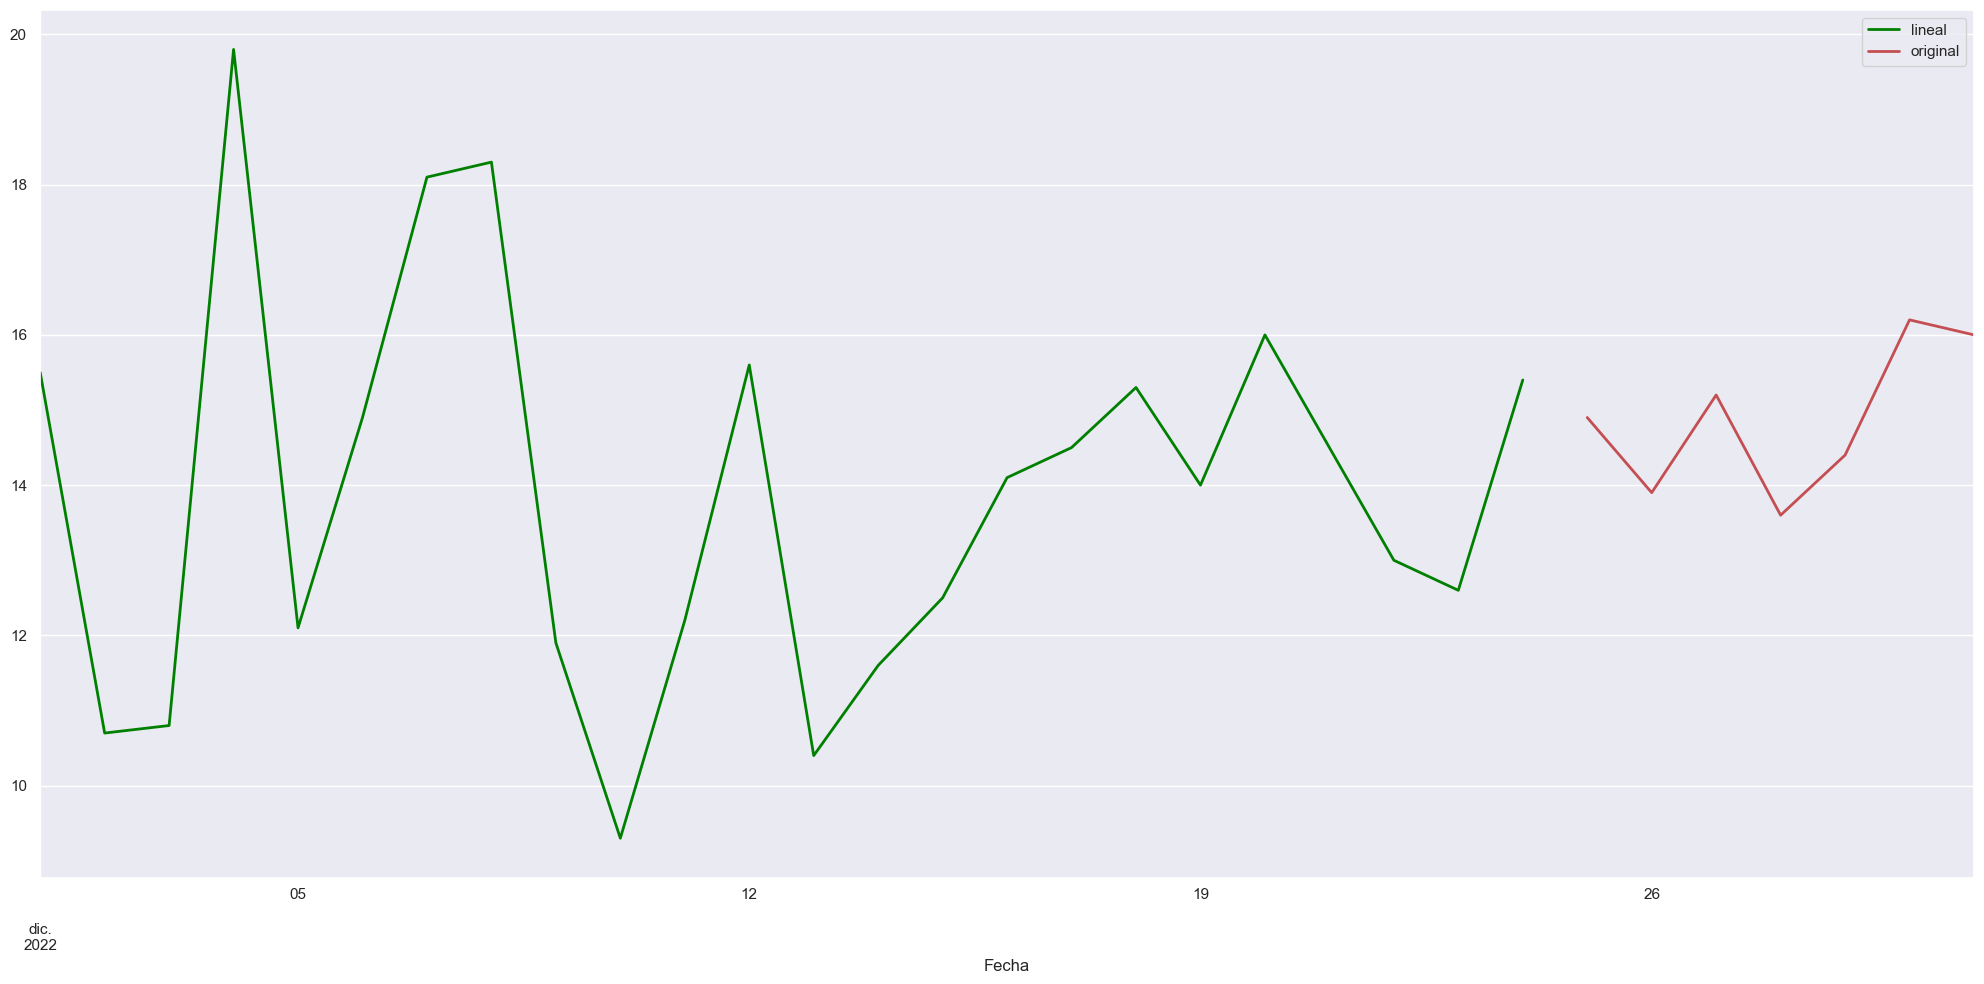

In [38]:
ax = train['2022-12-01':'2022-12-25']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
test['2022-12-25':'2022-12-31']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

### Prediccion Recursiva

#### LGBM

##### Definir Grid

In [77]:
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.001, 0.005 ,0.01],
    'max_depth': [2, 4, 6],
    'num_leaves': [5],
    'min_child_samples': [4]
}

In [78]:
lags_grid = [1, 2, 7, 14, 35]

In [79]:
train_log = np.log(train)

train_log

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2019-01-01,1.098612,2.890372,2.639057,4.007333,2.397895,4.276666,3.135494,5.686975,6.936343,1.098612,0.0,-0.616186,-0.544727,0.444686,2.302585
2019-01-02,1.386294,3.135494,2.639057,3.806662,2.302585,4.532599,3.332205,5.707110,6.935370,0.693147,0.0,-0.634878,-0.248461,0.076961,2.772589
2019-01-03,1.386294,3.135494,2.944439,3.637586,2.197225,4.574711,3.367296,5.703782,6.933423,0.693147,0.0,-0.494296,-0.248461,0.270027,2.197225
2019-01-04,1.945910,3.583519,2.484907,1.945910,2.197225,4.605170,3.850148,5.631212,6.935370,1.386294,0.0,-0.693147,-0.010050,-0.174353,3.091042
2019-01-05,2.197225,3.583519,2.397895,2.772589,1.945910,4.605170,3.891820,5.710427,6.937314,1.098612,0.0,-0.891598,-0.314711,-0.755023,2.944439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20,1.458615,2.251292,1.098612,3.566712,2.639057,4.605170,2.772589,5.697093,6.932448,1.386294,0.0,-0.673345,-0.116534,-0.673345,2.821379
2022-12-21,1.131402,2.282382,1.435085,3.298426,2.484907,4.605170,2.674149,5.429346,6.929517,1.386294,0.0,-0.634878,0.223144,-0.186330,2.813611
2022-12-22,0.955511,2.186051,2.079442,3.648578,2.564949,4.430817,2.564949,5.556828,6.931472,1.098612,0.0,-0.776529,0.246860,-0.314711,3.007661
2022-12-23,0.832909,2.197225,1.791759,2.674149,2.708050,4.343805,2.533697,5.420535,6.932448,0.693147,0.0,-1.049822,-0.127833,-0.248461,2.598979


##### Forecaster

In [80]:
forecaster = ForecasterAutoregMultiSeries(
                 regressor = LGBMRegressor(random_state=SEED, verbose=-1, device='gpu', gpu_platform_id=0, gpu_device_id=0 ),
                 lags      = 24
             )

In [81]:
results = grid_search_forecaster_multiseries(
              forecaster         = forecaster,
              series             = train_log,
              lags_grid          = lags_grid,
              param_grid         = param_grid,
              levels             = ['NOX (µg/m³N)'],
              steps              = 7,
              metric             = 'root_mean_squared_scaled_error',
              initial_train_size = 40,
              fixed_train_size   = True,
              refit              = True,
              skip_folds         = None,
              return_best        = True,
              n_jobs             = 'auto',
              verbose            = False
          )

results

135 models compared for 1 level(s). Number of iterations: 135.


lags grid: 100%|██████████| 5/5 [3:37:48<00:00, 2613.63s/it]  


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'min_child_samples': 4, 'n_estimators': 700, 'num_leaves': 5}
  Backtesting metric: 0.9702847685096814
  Levels: ['NOX (µg/m³N)']



,levels,lags,lags_label,params,root_mean_squared_scaled_error,learning_rate,max_depth,min_child_samples,n_estimators,num_leaves
0,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.01, 'max_depth': 6, 'min_c...",0.970285,0.010,6.0,4.0,700.0,5.0
1,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",0.970320,0.010,4.0,4.0,700.0,5.0
2,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",0.974134,0.010,4.0,4.0,500.0,5.0
3,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.01, 'max_depth': 6, 'min_c...",0.974172,0.010,6.0,4.0,500.0,5.0
4,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]","{'learning_rate': 0.005, 'max_depth': 6, 'min_...",0.982083,0.005,6.0,4.0,300.0,5.0
...,...,...,...,...,...,...,...,...,...,...
130,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.001, 'max_depth': 6, 'min_...",1.221354,0.001,6.0,4.0,300.0,5.0
131,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.001, 'max_depth': 4, 'min_...",1.232042,0.001,4.0,4.0,300.0,5.0
132,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.001, 'max_depth': 6, 'min_...",1.232042,0.001,6.0,4.0,300.0,5.0
133,[NOX (µg/m³N)],[1],[1],"{'learning_rate': 0.001, 'max_depth': 4, 'min_...",1.238881,0.001,4.0,4.0,300.0,5.0


In [82]:
save_forecaster(forecaster,file_name='./models/lgbm_forecaster_rec.joblib')
data_imputed.to_csv(path_or_buf='data_processed.csv')

ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(device='gpu', gpu_device_id=0, gpu_platform_id=0,
              learning_rate=0.01, max_depth=6, min_child_samples=4,
              n_estimators=700, num_leaves=5, random_state=123, verbose=-1) 
Lags: [1 2] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal_category 
Window size: 2 
Series levels (names): NO (µg/m³N), NO2 (µg/m³N), SO2 (µg/m³N), O3 (µg/m³N), TMP (ºC), ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'NO (µg/m³N)': ['2019-01-01', '2022-12-24'], 'NO2 (µg/m³N)': ['2019-01-01', '2022-12-24'], 'SO2 (µg/m³N)': ['2019-01-01', '2022-12-24'], ... 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.01, ... 

In [83]:
forecaster = load_forecaster(file_name='./models/lgbm_forecaster_rec.joblib')

ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(device='gpu', gpu_device_id=0, gpu_platform_id=0,
              learning_rate=0.01, max_depth=6, min_child_samples=4,
              n_estimators=700, num_leaves=5, random_state=123, verbose=-1) 
Lags: [1 2] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal_category 
Window size: 2 
Series levels (names): NO (µg/m³N), NO2 (µg/m³N), SO2 (µg/m³N), O3 (µg/m³N), TMP (ºC), ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'NO (µg/m³N)': ['2019-01-01', '2022-12-24'], 'NO2 (µg/m³N)': ['2019-01-01', '2022-12-24'], 'SO2 (µg/m³N)': ['2019-01-01', '2022-12-24'], ... 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.01, ... 

In [84]:
forecaster

ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(device='gpu', gpu_device_id=0, gpu_platform_id=0,
              learning_rate=0.01, max_depth=6, min_child_samples=4,
              n_estimators=700, num_leaves=5, random_state=123, verbose=-1) 
Lags: [1 2] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal_category 
Window size: 2 
Series levels (names): NO (µg/m³N), NO2 (µg/m³N), SO2 (µg/m³N), O3 (µg/m³N), TMP (ºC), ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'NO (µg/m³N)': ['2019-01-01', '2022-12-24'], 'NO2 (µg/m³N)': ['2019-01-01', '2022-12-24'], 'SO2 (µg/m³N)': ['2019-01-01', '2022-12-24'], ... 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.01, ... 

##### Evaluacion

In [85]:
predicciones= forecaster.predict(steps=test_steps)
predicciones

,C6H6 (µg/m³N),C7H8 (µg/m³N),DD (grados),HR (% H.R.),NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),PRB (mb),RS (W/m³),SO2 (µg/m³N),TMP (ºC),VV (m/s),XIL (µg/m³N)
2022-12-25,-0.991191,-0.060373,5.464334,4.469273,0.871742,2.345175,2.633052,3.085160,2.975353,6.900905,0.831090,1.272026,2.697037,0.030337,-0.007299
2022-12-26,-0.965705,-0.041222,5.412917,4.367610,0.847540,2.374007,2.668303,3.314355,3.050324,6.895977,0.873876,1.134772,2.708523,0.030337,0.109038
2022-12-27,-0.877514,-0.111468,5.372485,4.354730,0.760032,2.357444,2.657925,3.564951,3.022585,6.895977,0.720271,1.273588,2.750875,0.030337,0.002028
2022-12-28,-0.780060,-0.111468,5.372485,4.353705,0.758181,2.357444,2.673195,3.667386,3.073136,6.895977,0.718420,1.288376,2.750875,0.030337,0.076338
2022-12-29,-0.780060,-0.116102,5.372485,4.353705,0.758181,2.357444,2.673195,3.703929,3.049090,6.895977,0.718420,1.388676,2.750875,0.030337,0.056733
2022-12-30,-0.756074,-0.116102,5.372485,4.353705,0.758181,2.357444,2.673195,3.744220,3.073136,6.895977,0.718420,1.422842,2.750875,0.030337,0.056733
2022-12-31,-0.756074,-0.116102,5.372485,4.353705,0.758181,2.357444,2.673195,3.744220,3.049090,6.895977,0.718420,1.434948,2.750875,0.030337,0.056733


In [86]:
predicciones = np.exp(predicciones)

error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"]
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"],
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones["NOX (µg/m³N)"]
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 1.077
RMSSE: 0.162
MAE: 0.948


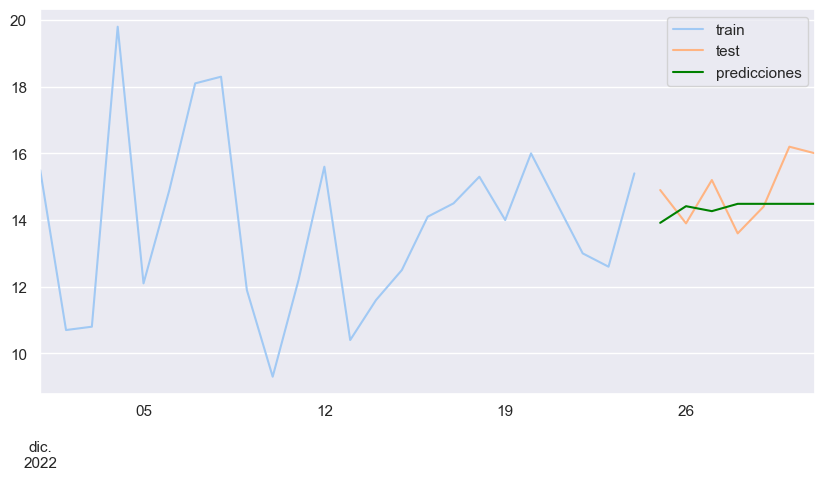

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones["NOX (µg/m³N)"].plot(ax=ax, label='predicciones', color='green')
ax.legend()

##### Intervalos de confianza

In [88]:
predictions_interval = forecaster.predict_interval(
                  steps    = 7,
                  interval = [2.5, 97.5],
                  n_boot   = 500
              )
predictions_interval

,C6H6 (µg/m³N),C6H6 (µg/m³N)_lower_bound,C6H6 (µg/m³N)_upper_bound,C7H8 (µg/m³N),C7H8 (µg/m³N)_lower_bound,C7H8 (µg/m³N)_upper_bound,DD (grados),DD (grados)_lower_bound,DD (grados)_upper_bound,HR (% H.R.),...,SO2 (µg/m³N)_upper_bound,TMP (ºC),TMP (ºC)_lower_bound,TMP (ºC)_upper_bound,VV (m/s),VV (m/s)_lower_bound,VV (m/s)_upper_bound,XIL (µg/m³N),XIL (µg/m³N)_lower_bound,XIL (µg/m³N)_upper_bound
2022-12-25,-0.991191,-2.414357,0.168078,-0.060373,-0.875763,0.717497,5.464334,3.579100,6.450597,4.469273,...,2.283480,2.697037,2.332218,2.927933,0.030337,-0.251746,0.693147,-0.007299,-1.101200,0.736496
2022-12-26,-0.965705,-2.564494,0.091926,-0.041222,-0.922455,0.806109,5.412917,3.579824,6.352889,4.367610,...,2.236998,2.708523,2.320962,2.971622,0.030337,-0.251746,0.688128,0.109038,-1.070056,0.806203
2022-12-27,-0.877514,-2.342244,0.308607,-0.111468,-1.194464,0.876300,5.372485,3.397797,7.113301,4.354730,...,2.498721,2.750875,2.360745,3.046812,0.030337,-0.321836,0.621958,0.002028,-1.078895,0.781202
2022-12-28,-0.780060,-2.207275,0.494303,-0.111468,-1.061285,0.789225,5.372485,3.817719,7.015869,4.353705,...,2.639354,2.750875,2.371499,3.117602,0.030337,-0.301833,0.656595,0.076338,-1.040557,0.872288
2022-12-29,-0.780060,-2.273587,0.588635,-0.116102,-1.234109,0.907919,5.372485,3.772691,7.129762,4.353705,...,2.666396,2.750875,2.359850,3.107007,0.030337,-0.321836,0.693147,0.056733,-0.929590,1.105525
2022-12-30,-0.756074,-2.302585,0.542766,-0.116102,-1.285248,0.783849,5.372485,3.385805,7.399412,4.353705,...,2.718292,2.750875,2.377482,3.145329,0.030337,-0.321991,0.688128,0.056733,-1.056495,1.027374
2022-12-31,-0.756074,-2.175883,0.607318,-0.116102,-1.233098,0.764048,5.372485,3.376103,7.380109,4.353705,...,2.716264,2.750875,2.410367,3.182653,0.030337,-0.290209,0.448192,0.056733,-1.211669,1.152605


In [89]:
predictions_interval = np.exp(predictions_interval)

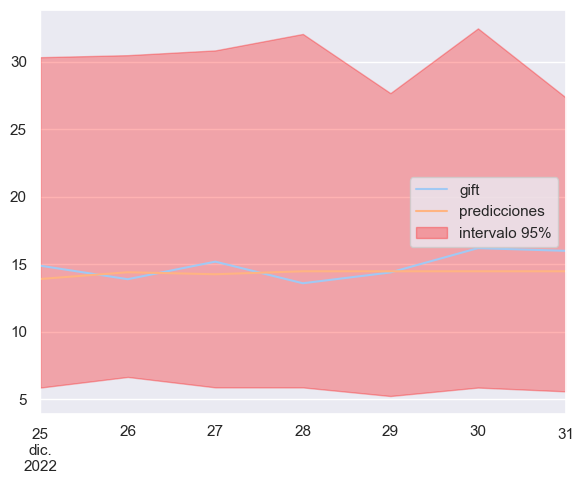

In [90]:
fig, ax = plt.subplots(figsize=(6, 5))
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predictions_interval['NOX (µg/m³N)'].plot(ax=ax, label='predicción')
ax.fill_between(
    predictions_interval.index,
    predictions_interval['NOX (µg/m³N)_lower_bound'],
    predictions_interval['NOX (µg/m³N)_upper_bound'],
    color = 'red',
    alpha = 0.3
)

ax.legend(labels=['gift','predicciones','intervalo 95%'])
fig.tight_layout()
plt.show()

##### Backtesting

In [91]:
metric, predictions_back = backtesting_forecaster_multiseries(
    forecaster            = forecaster,
    series                = train_log,
    levels                = ['NOX (µg/m³N)'],
    metric                = 'root_mean_squared_scaled_error',
    initial_train_size    = 40,
    fixed_train_size      = True,
    gap                   = 0,
    allow_incomplete_fold = True,
    refit                 = True,
    n_jobs                = 'auto',
    verbose               = True,
    steps                 = 7, 
    show_progress         = True  
)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 40
Number of observations used for backtesting: 1414
    Number of folds: 202
    Number skipped folds: 0 
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2019-01-01 00:00:00 -- 2019-02-09 00:00:00  (n=40)
    Validation: 2019-02-10 00:00:00 -- 2019-02-16 00:00:00  (n=7)
Fold: 1
    Training:   2019-01-08 00:00:00 -- 2019-02-16 00:00:00  (n=40)
    Validation: 2019-02-17 00:00:00 -- 2019-02-23 00:00:00  (n=7)
Fold: 2
    Training:   2019-01-15 00:00:00 -- 2019-02-23 00:00:00  (n=40)
    Validation: 2019-02-24 00:00:00 -- 2019-03-02 00:00:00  (n=7)
Fold: 3
    Training:   2019-01-22 00:00:00 -- 2019-03-02 00:00:00  (n=40)
    Validation: 2019-03-03 00:00:00 -- 2019-03-09 00:00:00  (n=7)
Fold: 4
    Training:   2019-01-29 00:00:00 -- 2019-03-09 00:00:00  (n=40)
    Validation: 20

100%|██████████| 202/202 [02:32<00:00,  1.33it/s]


In [92]:
predictions_back =  np.exp(predictions_back)

In [93]:
# Extraer las predicciones y los valores reales
y_pred = predictions_back["NOX (µg/m³N)"]
y_true = train[-len(y_pred):]["NOX (µg/m³N)"]  # Valores reales correspondientes a las predicciones
error_rmse_direct = root_mean_squared_error(
                y_true = y_true,
                y_pred = y_pred
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = y_true,
                y_pred = y_pred,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=y_true,
    y_pred=y_pred
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 6.309
RMSSE: 0.950
MAE: 4.027


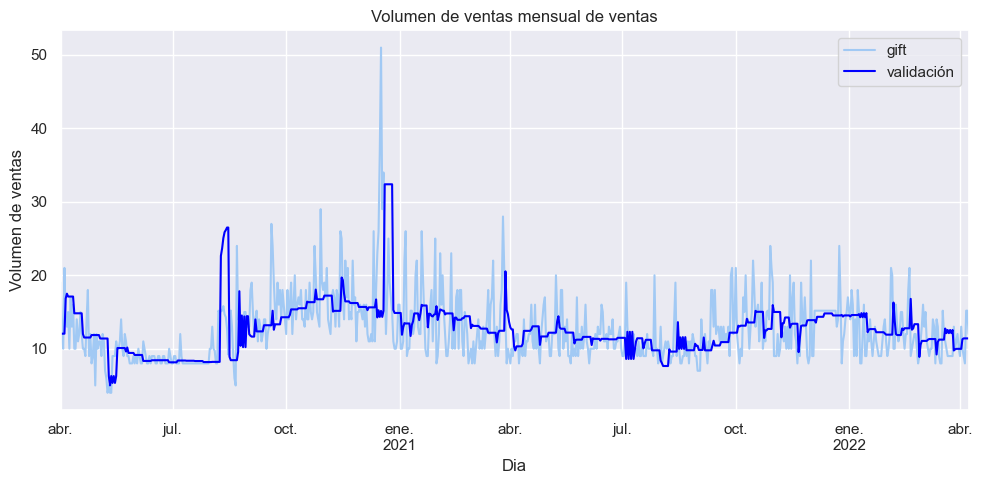

In [95]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2020-04-01":"2022-04-08"]["NOX (µg/m³N)"] .plot(ax=ax)
predictions_back["2020-04-01":"2022-04-08"]["NOX (µg/m³N)"].plot(ax=ax, color='blue')
ax.set_xlabel('Dia')
ax.set_ylabel('Volumen de ventas')
ax.set_title('Volumen de ventas mensual de ventas')
ax.legend(labels=['gift','validación'])
fig.tight_layout()
plt.show()

#### Random forest

#### SVM

### Prediccion Directa

Volvemos a generar el train y test para estar seguros de que sean los datos correctos sin tener aplicados la transformación logaritmica.

In [ ]:
test_steps = 7
train = data_imputed[:-test_steps]  # Todo menos las últimas 7 fechas
test = data_imputed[-test_steps:]  # Últimas 7 fechas
print(f'Tamaño del conjunto de training es %i' %len(train))
print(f'Tamaño del conjunto de test es %i' %len(test))
print(f'El conjunto de training va de {min(train.index)} y {max(train.index)}')
print(f'El conjunto de test va de {min(test.index)} y {max(test.index)}')

#### LGBM

##### Definir grid

In [ ]:
param_grid = {
    'n_estimators': [100,200,300],          # Número de árboles
    'learning_rate': [0.01, 0.1],      # Tasa de aprendizaje
    'max_depth': [3,5,10],                 # Máxima profundidad del árbol
    'min_child_samples': [10,20,30]       # Tamaño mínimo de muestra en nodos hoja
}

In [ ]:
lags_grid = [1, 2, 3, 7, 14, 21, 28, 29, 30, 31]

In [ ]:
level = "NOX (µg/m³N)"

##### Forecaster

In [ ]:
forecaster = ForecasterAutoregMultiVariate(
                 regressor = LGBMRegressor(random_state=SEED, verbose=-1),
                 level= level,
                 steps= 7, 
                 lags= 7,
             )

In [ ]:
results = grid_search_forecaster_multiseries(
              forecaster         = forecaster,
              series             = train,
              lags_grid          = lags_grid,
              param_grid         = param_grid,
              steps              = 7,
              metric             = 'root_mean_squared_scaled_error',
              initial_train_size = 40,
              fixed_train_size   = False,
              refit              = False,
              skip_folds         = None,
              return_best        = True,
              n_jobs             = 'auto',
              verbose            = False
          )

results

540 models compared for 1 level(s). Number of iterations: 540.


lags grid: 100%|██████████| 10/10 [1:30:00<00:00, 540.09s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 300}
  Backtesting metric: 0.7700887514242918
  Levels: ['NOX (µg/m³N)']



,levels,lags,lags_label,params,root_mean_squared_scaled_error,learning_rate,max_depth,min_child_samples,n_estimators
0,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.770089,0.01,10.0,30.0,300.0
1,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",0.770089,0.10,3.0,20.0,100.0
2,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",0.770089,0.10,3.0,20.0,200.0
3,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",0.770089,0.10,3.0,20.0,300.0
4,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",0.770089,0.10,3.0,30.0,100.0
...,...,...,...,...,...,...,...,...,...
535,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.521953,0.10,5.0,10.0,200.0
536,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",1.521953,0.10,3.0,10.0,200.0
537,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.1, 'max_depth': 10, 'min_c...",1.582885,0.10,10.0,10.0,300.0
538,[NOX (µg/m³N)],"[1, 2]","[1, 2]","{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.582885,0.10,5.0,10.0,300.0


In [ ]:

save_forecaster(forecaster,file_name='Models/lgbm_forecaster_dir.joblib')
data_imputed.to_csv(path_or_buf='data_processed.csv')


ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.01, max_depth=10, min_child_samples=30,
              n_estimators=300, random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importa

In [ ]:

forecaster = load_forecaster(file_name='Models/lgbm_forecaster_dir.joblib')

ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.01, max_depth=10, min_child_samples=30,
              n_estimators=300, random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importa

In [ ]:
forecaster 

ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.01, max_depth=10, min_child_samples=30,
              n_estimators=300, random_state=123, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importa

##### Evaluacion

In [ ]:
predicciones= forecaster.predict(steps=test_steps)
predicciones

,NOX (µg/m³N)
2022-12-25,13.317005
2022-12-26,13.900365
2022-12-27,13.394831
2022-12-28,12.908300
2022-12-29,14.149303
2022-12-30,12.612191
2022-12-31,13.976600


In [ ]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"]
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"],
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones["NOX (µg/m³N)"]
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 1.823
RMSSE: 0.274
MAE: 1.420


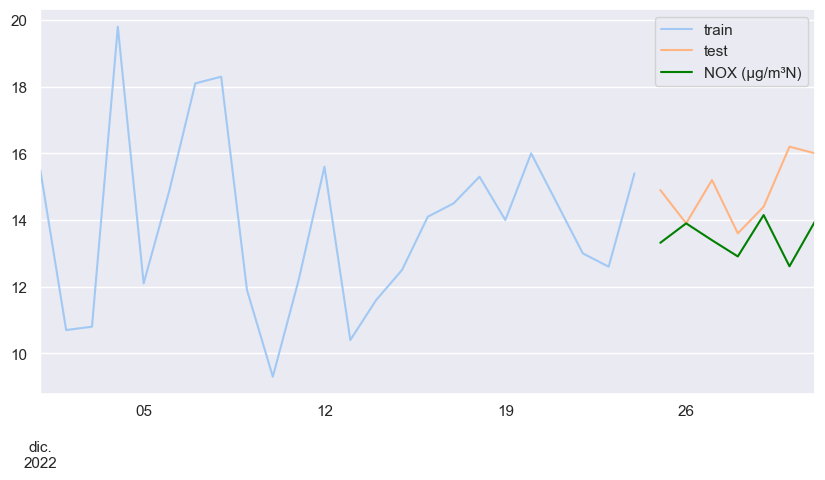

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones', color='green')
ax.legend()

##### Intervalos de confianza

In [ ]:
predictions_interval = forecaster.predict_interval(
                  steps    = 7,
                  interval = [2.5, 97.5],
                  n_boot   = 500
              )
predictions_interval

,NOX (µg/m³N),NOX (µg/m³N)_lower_bound,NOX (µg/m³N)_upper_bound
2022-12-25,13.317005,8.358766,21.319683
2022-12-26,13.900365,8.520270,20.716788
2022-12-27,13.394831,8.179513,22.294799
2022-12-28,12.908300,7.921165,21.508041
2022-12-29,14.149303,8.791687,22.652750
2022-12-30,12.612191,6.742828,21.926012
2022-12-31,13.976600,7.987287,22.593642


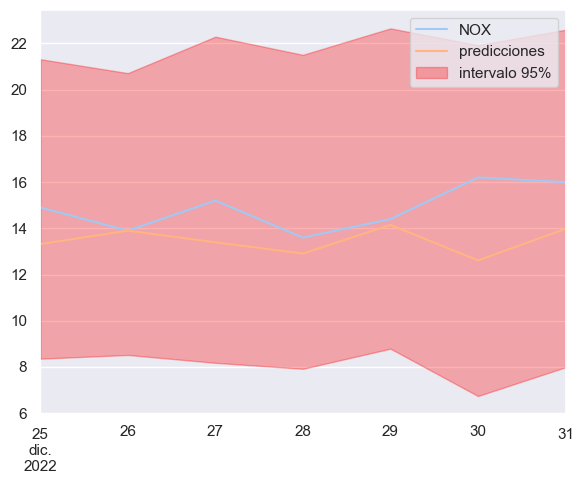

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predictions_interval['NOX (µg/m³N)'].plot(ax=ax, label='predicción')
ax.fill_between(
    predictions_interval.index,
    predictions_interval['NOX (µg/m³N)_lower_bound'],
    predictions_interval['NOX (µg/m³N)_upper_bound'],
    color = 'red',
    alpha = 0.3
)

ax.legend(labels=['NOX','predicciones','intervalo 95%'])
fig.tight_layout()
plt.show()

##### Backtesting

In [ ]:
metric, predictions_back = backtesting_forecaster_multiseries(
    forecaster            = forecaster,
    series                = train,
    steps              =    7,
    metric                = 'root_mean_squared_scaled_error',
    initial_train_size    = 40,
    fixed_train_size      = True,
    gap                   = 0,
    allow_incomplete_fold = True,
    refit                 = True,
    n_jobs                = 'auto',
    verbose               = True,
    show_progress         = True  
)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 40
Number of observations used for backtesting: 1414
    Number of folds: 202
    Number skipped folds: 0 
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2019-01-01 00:00:00 -- 2019-02-09 00:00:00  (n=40)
    Validation: 2019-02-10 00:00:00 -- 2019-02-16 00:00:00  (n=7)
Fold: 1
    Training:   2019-01-08 00:00:00 -- 2019-02-16 00:00:00  (n=40)
    Validation: 2019-02-17 00:00:00 -- 2019-02-23 00:00:00  (n=7)
Fold: 2
    Training:   2019-01-15 00:00:00 -- 2019-02-23 00:00:00  (n=40)
    Validation: 2019-02-24 00:00:00 -- 2019-03-02 00:00:00  (n=7)
Fold: 3
    Training:   2019-01-22 00:00:00 -- 2019-03-02 00:00:00  (n=40)
    Validation: 2019-03-03 00:00:00 -- 2019-03-09 00:00:00  (n=7)
Fold: 4
    Training:   2019-01-29 00:00:00 -- 2019-03-09 00:00:00  (n=40)
    Validation: 20

100%|██████████| 202/202 [00:46<00:00,  4.38it/s]


In [ ]:
# Extraer las predicciones y los valores reales
y_pred = predictions_back["NOX (µg/m³N)"]
y_true = train[-len(y_pred):]["NOX (µg/m³N)"]  # Valores reales correspondientes a las predicciones
error_rmse_direct = root_mean_squared_error(
                y_true = y_true,
                y_pred = y_pred
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = y_true,
                y_pred = y_pred,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=y_true,
    y_pred=y_pred
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 6.426
RMSSE: 0.967
MAE: 4.117


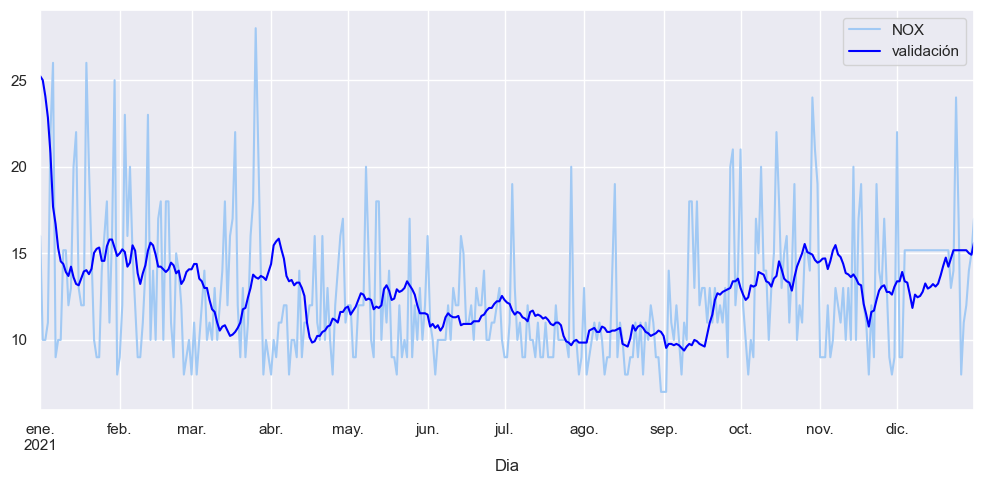

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2021-01-01":"2021-12-31"]["NOX (µg/m³N)"] .plot(ax=ax)
predictions_back["2021-01-01":"2021-12-31"].plot(ax=ax, color='blue')
ax.set_xlabel('Dia')
ax.legend(labels=['NOX','validación'])
fig.tight_layout()
plt.show()

#### Random Forest

##### Definir grid

In [ ]:
param_grid = {
    'n_estimators': [200,300],
    'max_depth': [5,8],  
    'verbose': [0],           # Máxima profundidad de los árboles
    'min_samples_split': [3,5],          # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2,4],           # Número mínimo de muestras en un nodo hoja
    'bootstrap': [True, False]            # Si se usa bootstrap para construir los árboles
}

In [ ]:
lags_grid = [1, 2, 3, 7, 14, 21, 28, 29, 30, 31]

##### Forecaster

In [ ]:
forecaster = ForecasterAutoregMultiVariate(
                 regressor = RandomForestRegressor(random_state=SEED, verbose=-1),
                 level= level,
                 steps= 7, 
                 lags= 7,
                
             )

In [ ]:
results = grid_search_forecaster_multiseries(
              forecaster         = forecaster,
              series             = train,
              lags_grid          = lags_grid,
              param_grid         = param_grid,
              steps              = 7,
              metric             = 'root_mean_squared_scaled_error',
              initial_train_size = 40,
              fixed_train_size   = False,
              refit              = False,
              skip_folds         = None,
              return_best        = True,
              n_jobs             = 'auto',
              verbose            = False
          )

results

320 models compared for 1 level(s). Number of iterations: 320.


lags grid: 100%|██████████| 10/10 [1:40:37<00:00, 603.77s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
  Parameters: {'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 200, 'verbose': 0}
  Backtesting metric: 0.6999942067941453
  Levels: ['NOX (µg/m³N)']



,levels,lags,lags_label,params,root_mean_squared_scaled_error,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators,verbose
0,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'bootstrap': False, 'max_depth': 8, 'min_samp...",0.699994,False,8,4,3,200,0
1,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'bootstrap': False, 'max_depth': 5, 'min_samp...",0.699994,False,5,4,5,200,0
2,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'bootstrap': False, 'max_depth': 5, 'min_samp...",0.699994,False,5,4,3,200,0
3,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'bootstrap': False, 'max_depth': 8, 'min_samp...",0.699994,False,8,4,5,200,0
4,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'bootstrap': False, 'max_depth': 8, 'min_samp...",0.711445,False,8,4,3,300,0
...,...,...,...,...,...,...,...,...,...,...,...
315,[NOX (µg/m³N)],"[1, 2, 3]","[1, 2, 3]","{'bootstrap': False, 'max_depth': 8, 'min_samp...",1.886097,False,8,2,3,200,0
316,[NOX (µg/m³N)],"[1, 2, 3]","[1, 2, 3]","{'bootstrap': False, 'max_depth': 5, 'min_samp...",1.888514,False,5,2,5,200,0
317,[NOX (µg/m³N)],"[1, 2, 3]","[1, 2, 3]","{'bootstrap': False, 'max_depth': 5, 'min_samp...",1.888581,False,5,2,3,300,0
318,[NOX (µg/m³N)],"[1, 2, 3]","[1, 2, 3]","{'bootstrap': False, 'max_depth': 5, 'min_samp...",1.888872,False,5,2,5,300,0


In [ ]:
forecaster

ForecasterAutoregMultiVariate 
Regressor: RandomForestRegressor(bootstrap=False, max_depth=8, min_samples_leaf=4,
                      min_samples_split=3, n_estimators=200, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_e

In [ ]:
save_forecaster(forecaster,file_name='Models/rbf_forecaster_dir.joblib')

ForecasterAutoregMultiVariate 
Regressor: RandomForestRegressor(bootstrap=False, max_depth=8, min_samples_leaf=4,
                      min_samples_split=3, n_estimators=200, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_e

In [ ]:

forecaster = load_forecaster(file_name='Models/rbf_forecaster_dir.joblib')

ForecasterAutoregMultiVariate 
Regressor: RandomForestRegressor(bootstrap=False, max_depth=8, min_samples_leaf=4,
                      min_samples_split=3, n_estimators=200, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_e

##### Evaluacion

In [ ]:
predicciones= forecaster.predict(steps=test_steps)
predicciones

,NOX (µg/m³N)
2022-12-25,13.687113
2022-12-26,13.513119
2022-12-27,12.442686
2022-12-28,12.347485
2022-12-29,12.136364
2022-12-30,13.120407
2022-12-31,15.583901


In [ ]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"]
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"],
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones["NOX (µg/m³N)"]
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 1.911
RMSSE: 0.288
MAE: 1.624


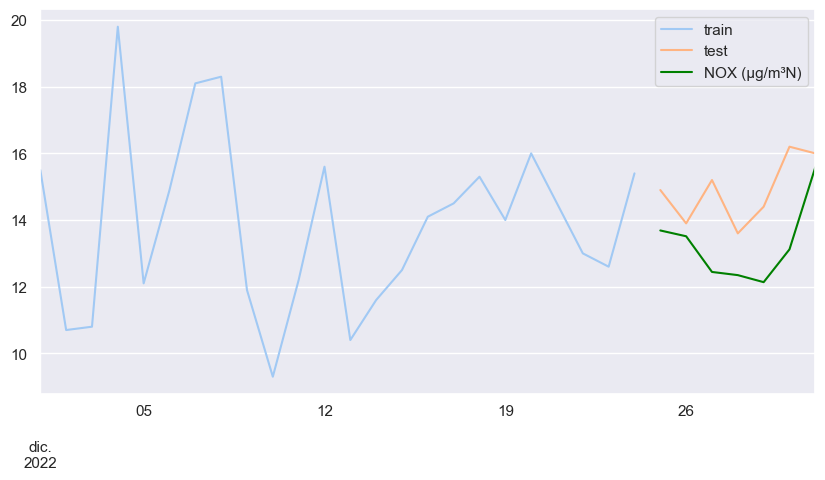

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones', color='green')
ax.legend()

##### Intervalos de confianza

In [ ]:
predictions_interval = forecaster.predict_interval(
                  steps    = 7,
                  interval = [2.5, 97.5],
                  n_boot   = 500
              )
predictions_interval

,NOX (µg/m³N),NOX (µg/m³N)_lower_bound,NOX (µg/m³N)_upper_bound
2022-12-25,13.687113,7.622228,20.773381
2022-12-26,13.513119,6.564714,20.897294
2022-12-27,12.442686,5.348698,20.638299
2022-12-28,12.347485,7.068394,20.252485
2022-12-29,12.136364,6.366012,21.311098
2022-12-30,13.120407,6.620407,20.959285
2022-12-31,15.583901,7.480816,25.252730


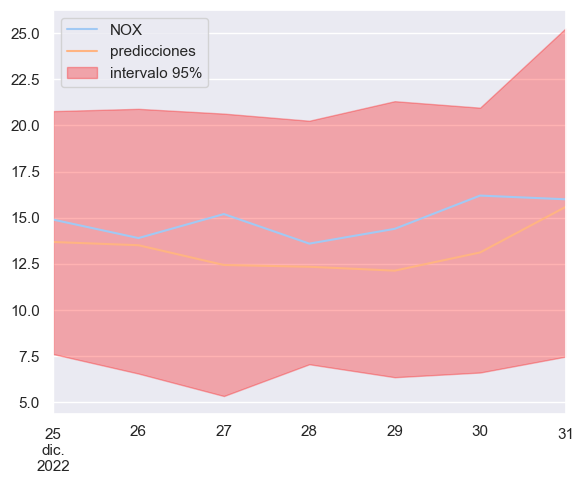

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predictions_interval['NOX (µg/m³N)'].plot(ax=ax, label='predicción')
ax.fill_between(
    predictions_interval.index,
    predictions_interval['NOX (µg/m³N)_lower_bound'],
    predictions_interval['NOX (µg/m³N)_upper_bound'],
    color = 'red',
    alpha = 0.3
)

ax.legend(labels=['NOX','predicciones','intervalo 95%'])
fig.tight_layout()
plt.show()

##### Backtesting

In [ ]:
metric, predictions_back = backtesting_forecaster_multiseries(
    forecaster            = forecaster,
    series                = train,
    steps              =    7,
    metric                = 'root_mean_squared_scaled_error',
    initial_train_size    = 40,
    fixed_train_size      = True,
    gap                   = 0,
    allow_incomplete_fold = True,
    refit                 = True,
    n_jobs                = 'auto',
    verbose               = True,
    show_progress         = True  
)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 40
Number of observations used for backtesting: 1414
    Number of folds: 202
    Number skipped folds: 0 
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2019-01-01 00:00:00 -- 2019-02-09 00:00:00  (n=40)
    Validation: 2019-02-10 00:00:00 -- 2019-02-16 00:00:00  (n=7)
Fold: 1
    Training:   2019-01-08 00:00:00 -- 2019-02-16 00:00:00  (n=40)
    Validation: 2019-02-17 00:00:00 -- 2019-02-23 00:00:00  (n=7)
Fold: 2
    Training:   2019-01-15 00:00:00 -- 2019-02-23 00:00:00  (n=40)
    Validation: 2019-02-24 00:00:00 -- 2019-03-02 00:00:00  (n=7)
Fold: 3
    Training:   2019-01-22 00:00:00 -- 2019-03-02 00:00:00  (n=40)
    Validation: 2019-03-03 00:00:00 -- 2019-03-09 00:00:00  (n=7)
Fold: 4
    Training:   2019-01-29 00:00:00 -- 2019-03-09 00:00:00  (n=40)
    Validation: 20

100%|██████████| 202/202 [09:00<00:00,  2.68s/it]


In [ ]:
# Extraer las predicciones y los valores reales
y_pred = predictions_back["NOX (µg/m³N)"]
y_true = train[-len(y_pred):]["NOX (µg/m³N)"]  # Valores reales correspondientes a las predicciones
error_rmse_direct = root_mean_squared_error(
                y_true = y_true,
                y_pred = y_pred
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = y_true,
                y_pred = y_pred,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=y_true,
    y_pred=y_pred
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 7.684
RMSSE: 1.156
MAE: 5.014


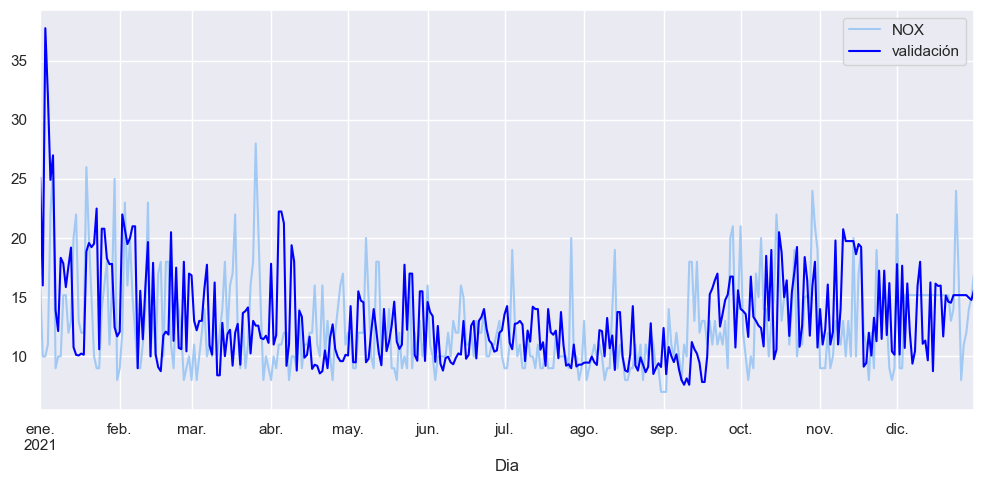

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2021-01-01":"2021-12-31"]["NOX (µg/m³N)"] .plot(ax=ax)
predictions_back["2021-01-01":"2021-12-31"].plot(ax=ax, color='blue')
ax.set_xlabel('Dia')
ax.legend(labels=['NOX','validación'])
fig.tight_layout()
plt.show()

#### SVM

##### Definir Grid

In [ ]:
param_grid = {
    'C': [0.1, 0.01],                   # Penalización por error
    'epsilon': [0.01, 0.1],         # Margen de tolerancia
    'kernel': ['linear', 'rbf'], # Tipo de kernel
    'gamma': ['scale', 'auto'],          # Función de kernel
    'degree': [3, 5,7]                     # Solo para el kernel 'poly': grado del polinomio
}


In [ ]:
lags_grid = [1, 2, 3, 7, 14, 21, 28, 29, 30, 31]

##### Forecaster

In [ ]:
forecaster = ForecasterAutoregMultiVariate(
                 regressor = SVR(),
                 level= level,
                 steps= 7, 
                 lags= 7,
               
              
             )

In [ ]:
results = grid_search_forecaster_multiseries(
              forecaster         = forecaster,
              series             = train,
              lags_grid          = lags_grid,
              param_grid         = param_grid,
              steps              = 7,
              metric             = 'root_mean_squared_scaled_error',
              initial_train_size = 40,
              fixed_train_size   = False,
              refit              = False,
              skip_folds         = None,
              return_best        = True,
              n_jobs             = 'auto',
              verbose            = False
          )

results

480 models compared for 1 level(s). Number of iterations: 480.


lags grid: 100%|██████████| 10/10 [45:03<00:00, 270.30s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
  Parameters: {'C': 0.01, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
  Backtesting metric: 0.569058563352521
  Levels: ['NOX (µg/m³N)']



,levels,lags,lags_label,params,root_mean_squared_scaled_error,C,degree,epsilon,gamma,kernel
0,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'C': 0.01, 'degree': 3, 'epsilon': 0.01, 'gam...",0.569059,0.01,3,0.01,scale,rbf
1,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'C': 0.01, 'degree': 5, 'epsilon': 0.01, 'gam...",0.569059,0.01,5,0.01,scale,rbf
2,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'C': 0.01, 'degree': 7, 'epsilon': 0.01, 'gam...",0.569059,0.01,7,0.01,scale,rbf
3,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'C': 0.01, 'degree': 5, 'epsilon': 0.01, 'gam...",0.569128,0.01,5,0.01,auto,rbf
4,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'C': 0.01, 'degree': 3, 'epsilon': 0.01, 'gam...",0.569128,0.01,3,0.01,auto,rbf
...,...,...,...,...,...,...,...,...,...,...
475,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]","{'C': 0.1, 'degree': 5, 'epsilon': 0.01, 'gamm...",8.149593,0.10,5,0.01,scale,linear
476,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]","{'C': 0.1, 'degree': 3, 'epsilon': 0.01, 'gamm...",8.149593,0.10,3,0.01,scale,linear
477,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]","{'C': 0.1, 'degree': 7, 'epsilon': 0.01, 'gamm...",8.149593,0.10,7,0.01,scale,linear
478,[NOX (µg/m³N)],"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]","{'C': 0.1, 'degree': 7, 'epsilon': 0.01, 'gamm...",8.149593,0.10,7,0.01,auto,linear


In [ ]:
forecaster

ForecasterAutoregMultiVariate 
Regressor: SVR(C=0.01, epsilon=0.01) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'C': 0.01, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
fit_kwarg

In [ ]:
save_forecaster(forecaster,file_name='Models/svm_forecaster_dir.joblib')

ForecasterAutoregMultiVariate 
Regressor: SVR(C=0.01, epsilon=0.01) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'C': 0.01, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
fit_kwarg

In [ ]:
forecaster= load_forecaster(file_name='Models/svm_forecaster_dir.joblib')

ForecasterAutoregMultiVariate 
Regressor: SVR(C=0.01, epsilon=0.01) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 21 
Target series, level: NOX (µg/m³N) 
Multivariate series (names): ['NO (µg/m³N)', 'NO2 (µg/m³N)', 'SO2 (µg/m³N)', 'O3 (µg/m³N)', 'TMP (ºC)', 'HR (% H.R.)', 'NOX (µg/m³N)', 'DD (grados)', 'PRB (mb)', 'RS (W/m³)', 'VV (m/s)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)', 'PM10 (µg/m³N)'] 
Maximum steps predicted: 7 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-01 00:00:00'), Timestamp('2022-12-24 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'C': 0.01, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
fit_kwarg

##### Evaluacion

In [ ]:
predicciones= forecaster.predict(steps=test_steps)

predicciones

,NOX (µg/m³N)
2022-12-25,13.325479
2022-12-26,13.329967
2022-12-27,13.264671
2022-12-28,13.229766
2022-12-29,13.148579
2022-12-30,13.071999
2022-12-31,13.088080


In [ ]:
error_rmse_direct = root_mean_squared_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"]
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = test["NOX (µg/m³N)"],
                y_pred = predicciones["NOX (µg/m³N)"],
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=test["NOX (µg/m³N)"],
    y_pred=predicciones["NOX (µg/m³N)"]
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 1.946
RMSSE: 0.293
MAE: 1.677


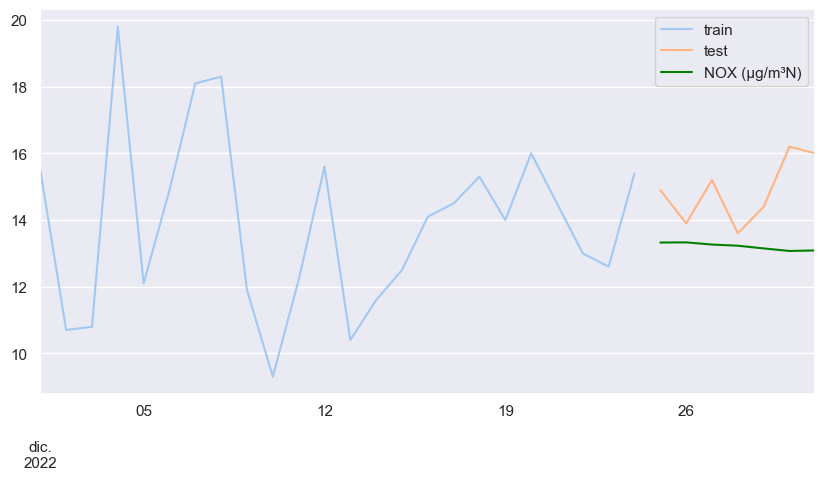

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2022-12-01" : "2022-12-25"]["NOX (µg/m³N)"].plot(ax=ax, label='train')
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones', color='green')
ax.legend()

##### Intervalos de confianza

In [ ]:
predictions_interval = forecaster.predict_interval(
                  steps    = 7,
                  interval = [2.5, 97.5],
                  n_boot   = 500
              )
predictions_interval

,NOX (µg/m³N),NOX (µg/m³N)_lower_bound,NOX (µg/m³N)_upper_bound
2022-12-25,13.325479,5.271140,31.346174
2022-12-26,13.329967,5.285681,28.562610
2022-12-27,13.264671,6.241498,31.578453
2022-12-28,13.229766,5.167569,30.987117
2022-12-29,13.148579,7.209040,31.302530
2022-12-30,13.071999,6.530575,31.494435
2022-12-31,13.088080,5.872114,29.503617


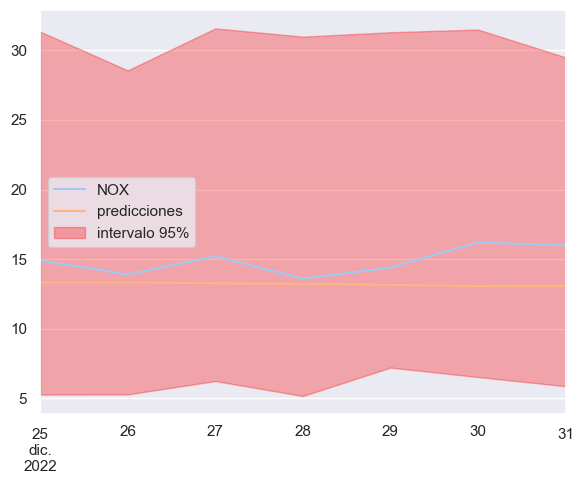

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
test["NOX (µg/m³N)"].plot(ax=ax, label='test')
predictions_interval['NOX (µg/m³N)'].plot(ax=ax, label='predicción')
ax.fill_between(
    predictions_interval.index,
    predictions_interval['NOX (µg/m³N)_lower_bound'],
    predictions_interval['NOX (µg/m³N)_upper_bound'],
    color = 'red',
    alpha = 0.3
)

ax.legend(labels=['NOX','predicciones','intervalo 95%'])
fig.tight_layout()
plt.show()

##### Backtesting

In [ ]:
metric, predictions_back = backtesting_forecaster_multiseries(
    forecaster            = forecaster,
    series                = train,
    steps              =    7,
    metric                = 'root_mean_squared_scaled_error',
    initial_train_size    = 40,
    fixed_train_size      = True,
    gap                   = 0,
    allow_incomplete_fold = True,
    refit                 = True,
    n_jobs                = 'auto',
    verbose               = True,
    show_progress         = True  
)


Information of backtesting process
----------------------------------
Number of observations used for initial training: 40
Number of observations used for backtesting: 1414
    Number of folds: 202
    Number skipped folds: 0 
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2019-01-01 00:00:00 -- 2019-02-09 00:00:00  (n=40)
    Validation: 2019-02-10 00:00:00 -- 2019-02-16 00:00:00  (n=7)
Fold: 1
    Training:   2019-01-08 00:00:00 -- 2019-02-16 00:00:00  (n=40)
    Validation: 2019-02-17 00:00:00 -- 2019-02-23 00:00:00  (n=7)
Fold: 2
    Training:   2019-01-15 00:00:00 -- 2019-02-23 00:00:00  (n=40)
    Validation: 2019-02-24 00:00:00 -- 2019-03-02 00:00:00  (n=7)
Fold: 3
    Training:   2019-01-22 00:00:00 -- 2019-03-02 00:00:00  (n=40)
    Validation: 2019-03-03 00:00:00 -- 2019-03-09 00:00:00  (n=7)
Fold: 4
    Training:   2019-01-29 00:00:00 -- 2019-03-09 00:00:00  (n=40)
    Validation: 20

100%|██████████| 202/202 [00:27<00:00,  7.35it/s]


In [ ]:
# Extraer las predicciones y los valores reales
y_pred = predictions_back["NOX (µg/m³N)"]
y_true = train[-len(y_pred):]["NOX (µg/m³N)"]  # Valores reales correspondientes a las predicciones
error_rmse_direct = root_mean_squared_error(
                y_true = y_true,
                y_pred = y_pred
            )
error_rmsse_direct = root_mean_squared_scaled_error(
                y_true = y_true,
                y_pred = y_pred,
                y_train = train["NOX (µg/m³N)"]
            )
mae_direct = mean_absolute_error(
    y_true=y_true,
    y_pred=y_pred
)
print(f"RMSE: {error_rmse_direct:.3f}")
print(f"RMSSE: {error_rmsse_direct:.3f}")
print(f"MAE: {mae_direct:.3f}")

RMSE: 6.635
RMSSE: 0.999
MAE: 4.147


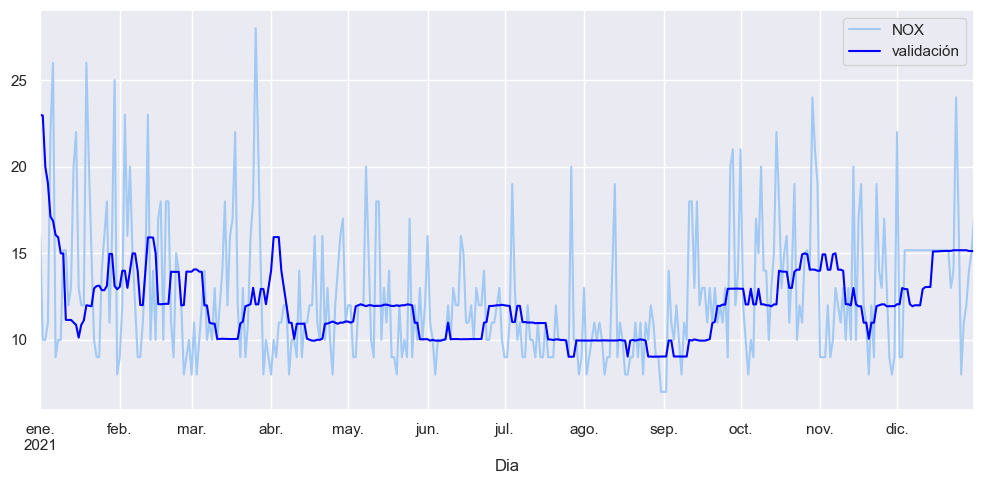

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
train["2021-01-01":"2021-12-31"]["NOX (µg/m³N)"] .plot(ax=ax)
predictions_back["2021-01-01":"2021-12-31"].plot(ax=ax, color='blue')
ax.set_xlabel('Dia')
ax.legend(labels=['NOX','validación'])
fig.tight_layout()
plt.show()